In [45]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, to_date, col, lit

# Khởi tạo Spark
spark = SparkSession.builder \
    .appName("Crime Query") \
    .getOrCreate()


In [47]:
# Đường dẫn đến file parquet
df = spark.read.parquet("C:/Users/ADMIN/DATA ANALYST/Projectdata/Chicago_Crimes_ZIP.parquet")
df.show(5)


+-------------+------------+--------+----------+--------------------+--------------------+----+-----------------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+--------------------+-------+
|            x|           y|      ID|CaseNumber|                Date|               Block|IUCR|      PrimaryType|         Description|LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|           UpdatedOn|ZIPCode|
+-------------+------------+--------+----------+--------------------+--------------------+----+-----------------+--------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+--------------------+-------+
|-87.677483468|41.955113932|10773691|  HZ539008|12/02/2016 06:15:...|  019XX W CUYLER AVE|1310|  CRIMINAL DAMAGE|         TO PROPERTY|          RESIDENCE| false|   false|1912|     019|  47| 

In [61]:
from datetime import datetime
import pandas as pd

# --- THÔNG SỐ NGƯỜI DÙNG NHẬP ---
start_date_str = '01/01/2018'   # MM/DD/YYYY
end_date_str   = '12/31/2018'

# Tọa độ vùng cần lọc (x = kinh độ, y = vĩ độ)
x_min, y_min = -87.75, 41.75
x_max, y_max = -87.60, 41.90

# --- ĐỌC FILE PARQUET ---
df = pd.read_parquet('C:/Users/ADMIN/DATA ANALYST/Projectdata/Chicago_Crimes_ZIP.parquet')

# --- CHUYỂN NGÀY VÀ ĐẢM BẢO ĐÚNG KIỂU ---
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
start_date = datetime.strptime(start_date_str, '%m/%d/%Y')
end_date   = datetime.strptime(end_date_str, '%m/%d/%Y')

# --- LỌC THEO THỜI GIAN ---
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# --- LOẠI BỎ GIÁ TRỊ THIẾU ---
df = df.dropna(subset=['x', 'y', 'Date', 'CaseNumber'])

# --- LỌC THEO TỌA ĐỘ NGƯỜI DÙNG NHẬP ---
df = df[(df['x'] >= x_min) & (df['x'] <= x_max) & 
        (df['y'] >= y_min) & (df['y'] <= y_max)]

# --- CHỌN CỘT CẦN THIẾT ---
result_df = df[['x', 'y', 'CaseNumber', 'Date']].copy()

# --- IN THÔNG TIN THỐNG KÊ ---
print(f"Số vụ án sau khi lọc: {len(result_df)}")
print(result_df.head())

# --- LƯU VÀO CSV ---
if len(result_df) > 0:
    output_path = 'C:/Users/ADMIN/DATA ANALYST/Projectdata/RangeReportResult3'
    result_df.to_csv(output_path, index=False)
    print(f"✅ Dữ liệu đã được lưu vào: {output_path}")
else:
    print("⚠️ Không có dữ liệu sau khi lọc.")


Số vụ án sau khi lọc: 18
             x          y CaseNumber                Date
61  -87.628277  41.878179   JB335280 2018-07-04 17:00:00
63  -87.625448  41.878260   JB394184 2018-08-15 08:10:00
82  -87.627440  41.868165   JB114095 2018-01-12 17:55:00
103 -87.639583  41.878840   JB496678 2018-10-30 15:20:00
105 -87.635755  41.879363   JC104462 2018-12-28 21:35:00
✅ Dữ liệu đã được lưu vào: C:/Users/ADMIN/DATA ANALYST/Projectdata/RangeReportResult3


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7652\4075480298.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đường dẫn file CSV đã tạo từ bước trước
file_path = 'C:/Users/ADMIN/DATA ANALYST/Projectdata/RangeReportResult3'

# Đọc dữ liệu
df = pd.read_csv(file_path)

# Kiểm tra nhanh dữ liệu
print(df.head())


           x          y CaseNumber                 Date
0 -87.628277  41.878179   JB335280  2018-07-04 17:00:00
1 -87.625448  41.878260   JB394184  2018-08-15 08:10:00
2 -87.627440  41.868165   JB114095  2018-01-12 17:55:00
3 -87.639583  41.878840   JB496678  2018-10-30 15:20:00
4 -87.635755  41.879363   JC104462  2018-12-28 21:35:00


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7652\77614102.py:12: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


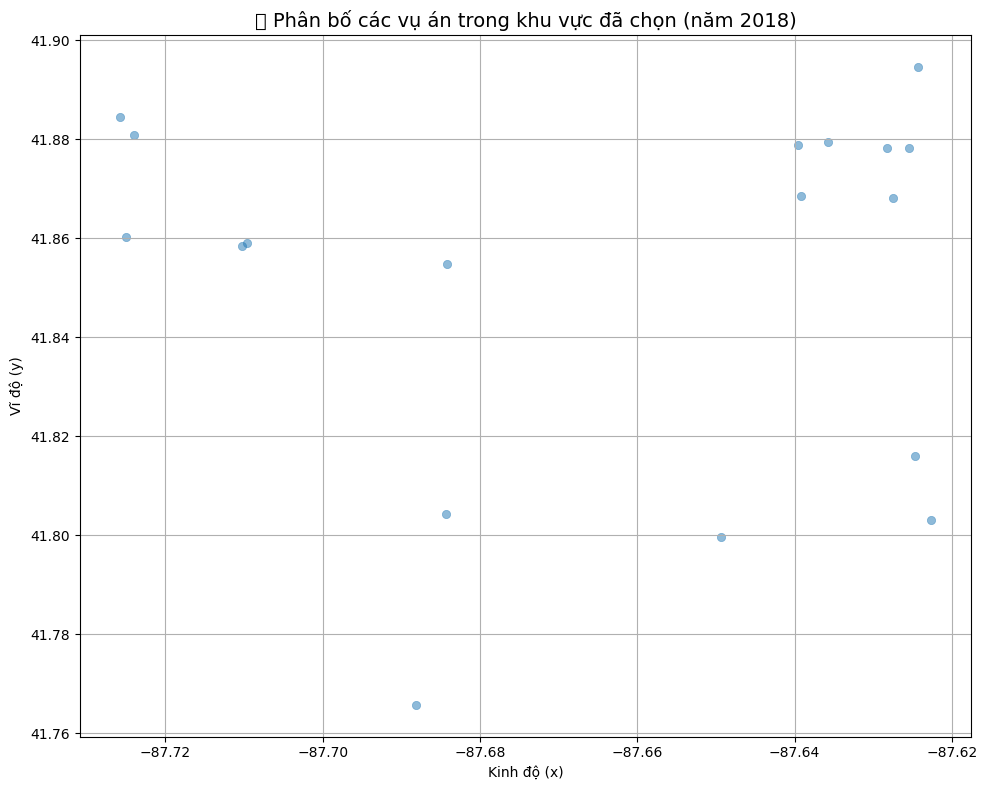

In [65]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 8))

# Vẽ scatter plot với Seaborn
sns.scatterplot(data=df, x='x', y='y', alpha=0.5, edgecolor=None)

# Trang trí biểu đồ
plt.title('📍 Phân bố các vụ án trong khu vực đã chọn (năm 2018)', fontsize=14)
plt.xlabel('Kinh độ (x)')
plt.ylabel('Vĩ độ (y)')
plt.grid(True)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [67]:
from datetime import datetime
import pandas as pd

# --- MỞ RỘNG THỜI GIAN ---
start_date_str = '01/01/2017'   # lấy từ năm 2017
end_date_str   = '12/31/2019'   # đến hết năm 2019

# --- MỞ RỘNG KHU VỰC ---
x_min, y_min = -87.80, 41.70
x_max, y_max = -87.55, 41.95

# --- ĐỌC FILE PARQUET ---
df = pd.read_parquet('C:/Users/ADMIN/DATA ANALYST/Projectdata/Chicago_Crimes_ZIP.parquet')

# --- CHUYỂN NGÀY ---
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
start_date = datetime.strptime(start_date_str, '%m/%d/%Y')
end_date = datetime.strptime(end_date_str, '%m/%d/%Y')

# --- LỌC THEO NGÀY ---
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# --- LỌC THEO TỌA ĐỘ ---
df = df[(df['x'].between(x_min, x_max)) & (df['y'].between(y_min, y_max))]

# --- BỎ GIÁ TRỊ THIẾU (chỉ khi đã lọc gần xong) ---
df = df.dropna(subset=['x', 'y', 'CaseNumber', 'Date'])

# --- LẤY CỘT CẦN THIẾT ---
result_df = df[['x', 'y', 'CaseNumber', 'Date']].copy()

# --- THỐNG KÊ & LƯU FILE ---
print(f"Tổng số vụ án sau khi mở rộng lọc: {len(result_df)}")
print(result_df.head())

# Lưu file
if len(result_df) > 0:
    output_path = 'C:/Users/ADMIN/DATA ANALYST/Projectdata/RangeReportResult_Extended'
    result_df.to_csv(output_path, index=False)
    print(f"✅ Dữ liệu đã được lưu vào: {output_path}")
else:
    print("⚠️ Không có dữ liệu sau khi lọc.")


Tổng số vụ án sau khi mở rộng lọc: 85
            x          y CaseNumber                Date
41 -87.622212  41.702902   JA119362 2017-01-10 12:00:00
45 -87.620122  41.707766   JB176514 2018-03-07 05:20:00
61 -87.628277  41.878179   JB335280 2018-07-04 17:00:00
63 -87.625448  41.878260   JB394184 2018-08-15 08:10:00
64 -87.674557  41.712869   JB459129 2018-10-01 22:30:00
✅ Dữ liệu đã được lưu vào: C:/Users/ADMIN/DATA ANALYST/Projectdata/RangeReportResult_Extended


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7652\1758058892.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


           x          y CaseNumber                 Date
0 -87.622212  41.702902   JA119362  2017-01-10 12:00:00
1 -87.620122  41.707766   JB176514  2018-03-07 05:20:00
2 -87.628277  41.878179   JB335280  2018-07-04 17:00:00
3 -87.625448  41.878260   JB394184  2018-08-15 08:10:00
4 -87.674557  41.712869   JB459129  2018-10-01 22:30:00


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7652\3833415484.py:23: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


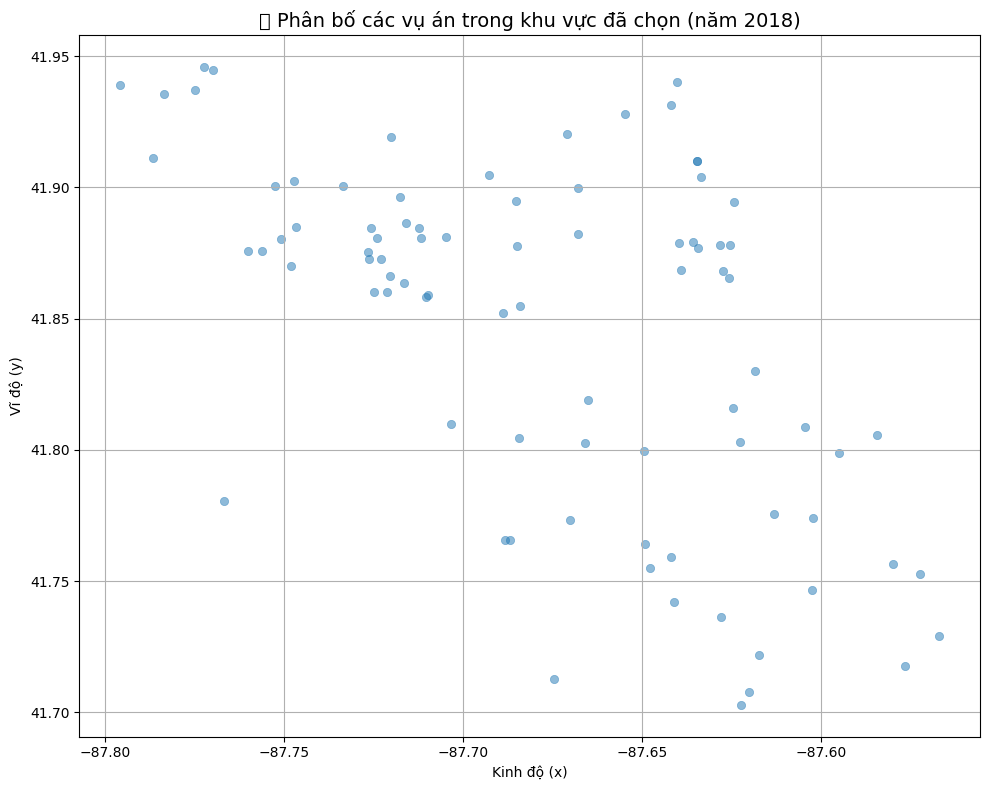

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đường dẫn file CSV đã tạo từ bước trước
file_path = 'C:/Users/ADMIN/DATA ANALYST/Projectdata/RangeReportResult_Extended'

# Đọc dữ liệu
df = pd.read_csv(file_path)

# Kiểm tra nhanh dữ liệu
print(df.head())
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 8))

# Vẽ scatter plot với Seaborn
sns.scatterplot(data=df, x='x', y='y', alpha=0.5, edgecolor=None)

# Trang trí biểu đồ
plt.title('📍 Phân bố các vụ án trong khu vực đã chọn (năm 2018)', fontsize=14)
plt.xlabel('Kinh độ (x)')
plt.ylabel('Vĩ độ (y)')
plt.grid(True)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()
